***
   # KD Analysis (*Price* vs. *No of Stops* vs. *Flight Duration*) #
***

- What is the correlation between the price and number of stops? Bar charts, average of prices. - Kristina
- What is the correlation between duration of the flight and the price? – Scatter Plot, average price, and hours. - Kristina

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib.pyplot import figure
from scipy.stats import linregress

In [4]:
flight_data = pd.read_csv('Resources/Clean_Dataset.csv', index_col=0)
flight_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price_INR,price_USD
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,71.44
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,71.44
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,71.47
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,71.46
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,71.46


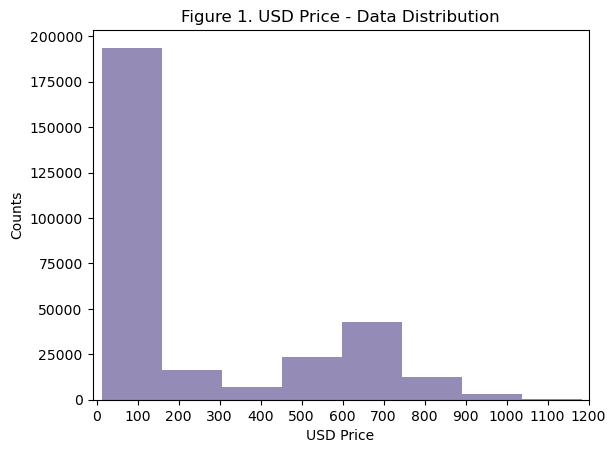

NormaltestResult(statistic=12.720126318123727, pvalue=0.0017292574901272252)


<Figure size 640x480 with 0 Axes>

In [5]:
#Data Exploration

prices = flight_data["price_USD"]
plt.hist(prices, color="#948BB7")
plt.title("Figure 1. USD Price - Data Distribution")
plt.xlabel('USD Price')
plt.ylabel('Counts')
plt.xticks(np.arange(0, 1300, step=100))
plt.xlim(-10, 1200)
plt.show()
print(st.normaltest(prices.sample(50)))

plt.savefig("output_data/Fig1.png")

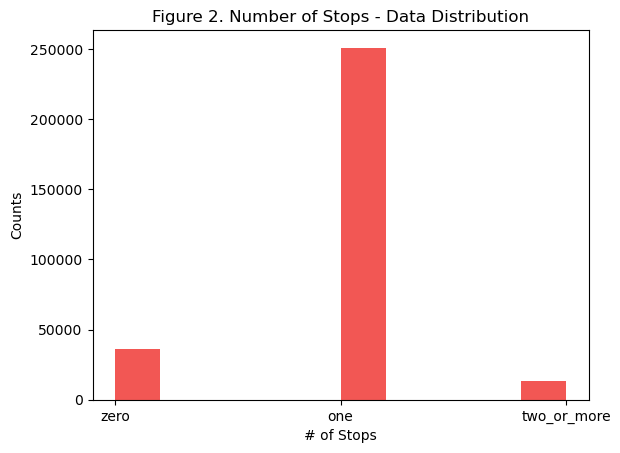

<Figure size 640x480 with 0 Axes>

In [6]:
#Data Exploration

stops = flight_data["stops"]
plt.hist(stops, color="#F25754")
plt.title("Figure 2. Number of Stops - Data Distribution")
plt.xlabel('# of Stops')
plt.ylabel('Counts')
plt.show()

plt.savefig("output_data/Fig2.png")

## Section 1. Comparing # of Stops vs Ticket Prices

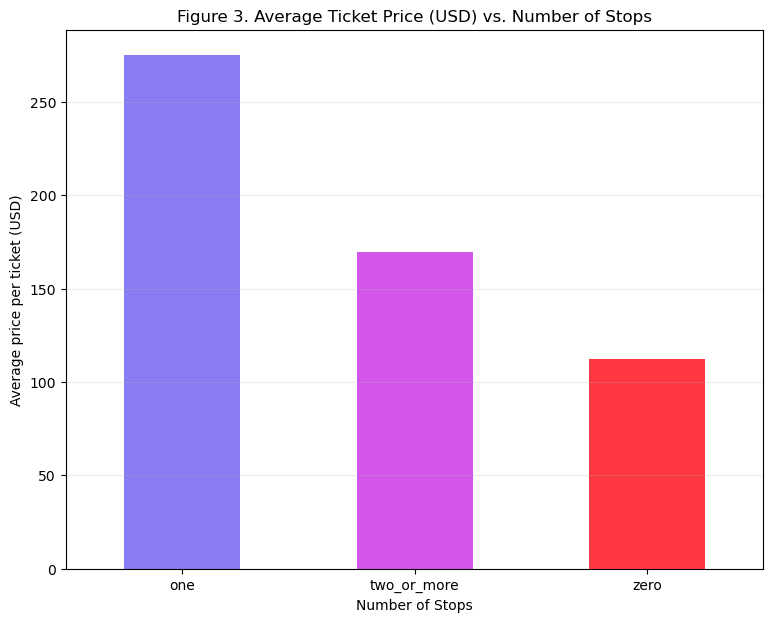

<Figure size 640x480 with 0 Axes>

In [7]:
#Created color list
colors = ["#897CF5", "#D356EA", "#FF3844"]

#Created dataset of average USD prices by number of stops
avg_price_by_stop = flight_data.groupby(["stops"])["price_USD"].mean()

#Created bar chart
avg_price_by_stop.plot(kind='bar', color = colors, rot=0, figsize = (9, 7),
                      xlabel="Number of Stops", ylabel="Average price per ticket (USD)",
                      title="Figure 3. Average Ticket Price (USD) vs. Number of Stops")
plt.grid(alpha = 0.25, axis = "y")
plt.show()

plt.savefig("output_data/Fig3.png")

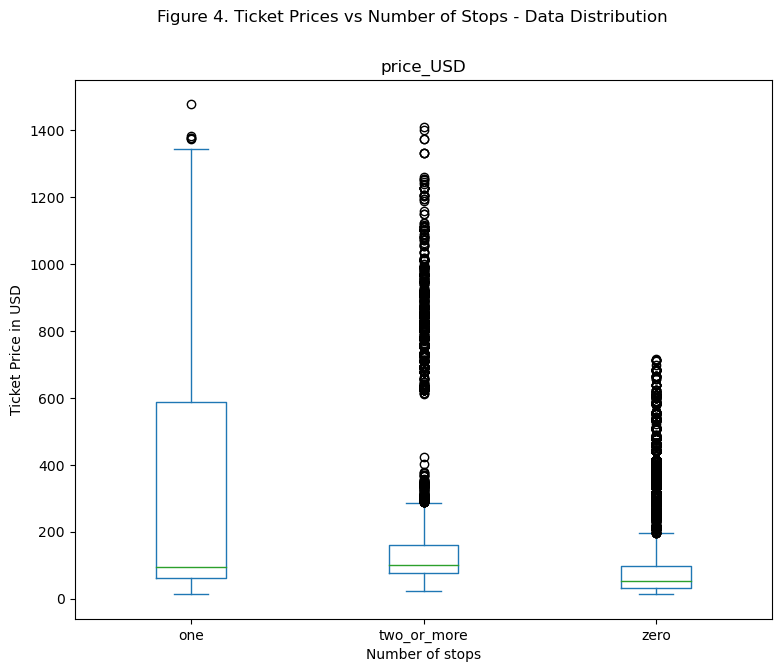

<Figure size 640x480 with 0 Axes>

In [8]:
#Data Exploration
#Created box plot to illustrate data distribution by number of stops
flight_data.plot.box(column="price_USD", by="stops",
                     xlabel="Number of stops", ylabel="Ticket Price in USD",
                     title="Figure 4. Ticket Prices vs Number of Stops - Data Distribution",
                     figsize=(9, 7))
plt.show()

plt.savefig("output_data/Fig4.png")

In [9]:
zero_min = flight_data.loc[flight_data['stops']=='zero', 'duration'].min()
zero_max = flight_data.loc[flight_data['stops']=='zero', 'duration'].max()
one_min = flight_data.loc[flight_data['stops']=='one', 'duration'].min()
one_max = flight_data.loc[flight_data['stops']=='one', 'duration'].max()
twoplus_min = flight_data.loc[flight_data['stops']=='two_or_more', 'duration'].min()
twoplus_max = flight_data.loc[flight_data['stops']=='two_or_more', 'duration'].max()

duration_sumary = { "Number of Stops": ("Zero", "One", "Two or more"),
                  "Min Flight Duration (hrs)": (zero_min, one_min, twoplus_min),
                  "Max Flight Duration (hrs)" : (zero_max, one_max, twoplus_max)}
duration_sumary_df = pd.DataFrame(duration_sumary)
duration_sumary_df

,Number of Stops,Min Flight Duration (hrs),Max Flight Duration (hrs)
0,Zero,0.83,3.58
1,One,2.92,49.83
2,Two or more,3.92,49.83


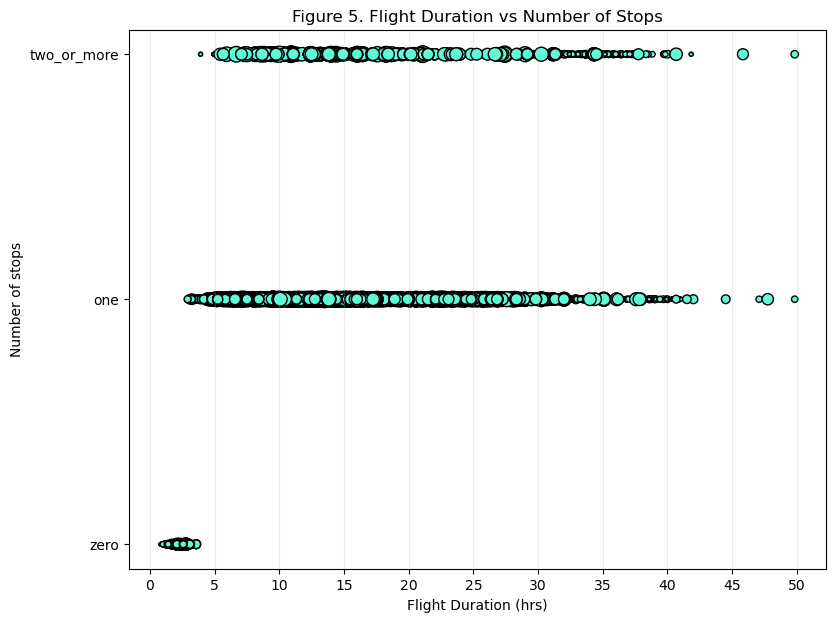

<Figure size 640x480 with 0 Axes>

In [10]:
#Show data distribution of durations and number of stops
size = flight_data['price_USD'].astype(float)
flight_data.plot(kind="scatter", x="duration", y="stops",
                 xlabel="Flight Duration (hrs)", ylabel="Number of stops",
                title ="Figure 5. Flight Duration vs Number of Stops", figsize=(9, 7), c="#5EFBD6", s=(size*0.1), edgecolors="black")
plt.xticks(np.arange(0, 55, step=5))
plt.grid(alpha=0.25, axis="x")
plt.show()

plt.savefig("output_data/Fig5.png")

## Section 1. Conclusions: 

***
- Flights with "zero" stops are mostly short-distanced (duration of the flights is between 0.83 to 3.58 hrs), while flight data with "one" and "two_or_more" stops have minimum duration closer to 3hrs and up until 50 hrs.
***
- This explains why on the above bar chart "zero" stops tickets are cheapest, because they're also shortest flights compared to other two categories.
***
- My decision is to perform a quick analysis on ony "zero"-stops data, before eliminating it from the dataset to work on other two sections more closely.
***

# Section 2. Flight Duration vs. Ticket Price

### Analysis of Flight Data with Zero Stops (Avg Ticket Price vs Flight Duration)

Business Class: The correlation between both factors is 0.93
Economy Class: The correlation between both factors is 0.88


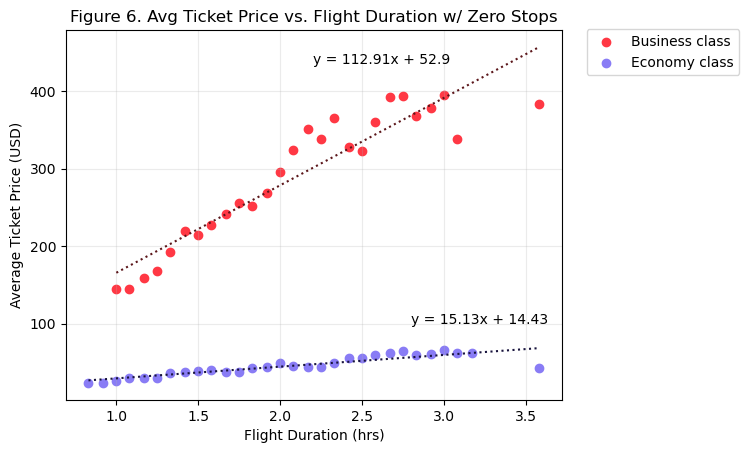

<Figure size 640x480 with 0 Axes>

In [11]:
# Created dataset with zero stops only
zerostops_df = flight_data.loc[flight_data["stops"]== "zero", :]

#Created dataframes of Average prices grouped by Class and Duration
zs_avg_price = pd.DataFrame(zerostops_df.groupby(["class", "duration"])["price_USD"].mean()).reset_index()

#Separated df for Economy class only
zs_avg_price_eco = zs_avg_price.loc[zs_avg_price["class"]=="Economy", ["duration", "price_USD"]].reset_index(drop=True)

#Separated df for Business class only
zs_avg_price_bus = zs_avg_price.loc[zs_avg_price["class"]=="Business", ["duration", "price_USD"]].reset_index(drop=True)

#Pre-set X and Y values for plotting (Economy Class)
x_values0eco = zs_avg_price_eco["duration"]
y_values0eco = zs_avg_price_eco["price_USD"]

#Pre-set X and Y values for plotting (Business Class)
x_values0bus = zs_avg_price_bus["duration"]
y_values0bus = zs_avg_price_bus["price_USD"]

#Plot scatters for Business and Economy Class
fig1 = plt.scatter(x=x_values0bus, y=y_values0bus, color="#FF3844", label="Business class")
fig2 = plt.scatter(x=x_values0eco, y=y_values0eco, color="#897CF5", label="Economy class")

plt.legend(loc=(1.05,0.878))
plt.grid(alpha=0.25)
plt.xlabel("Flight Duration (hrs)")
plt.ylabel("Average Ticket Price (USD)")
plt.title("Figure 6. Avg Ticket Price vs. Flight Duration w/ Zero Stops")


# Add the linear regression equation and line to plot (Economy Class)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values0eco, y_values0eco)
regress_values = x_values0eco * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values0eco,regress_values,color="#19143E", linestyle=":")
plt.annotate(line_eq,(2.8,100),fontsize=10,color="black")

# Add the linear regression equation and line to plot (Business Class)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values0bus, y_values0bus)
regress_values = x_values0bus * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values0bus,regress_values,color="#5B161A", linestyle=":")
plt.annotate(line_eq,(2.2,436),fontsize=10,color="black")

#Correlaion coefficient for Business Class 
business_correlation = st.pearsonr(x_values0bus,y_values0bus)
print(f"Business Class: The correlation between both factors is {round(business_correlation[0],2)}")

#Correlaion coefficient for Economy Class 
economy_correlation = st.pearsonr(x_values0eco,y_values0eco)
print(f"Economy Class: The correlation between both factors is {round(economy_correlation[0],2)}")

plt.show()

plt.savefig("output_data/Fig6.png")

### Conclusions: 
- Analyzing ZERO stops flight data:
    - STRONG correlation between Avg Ticket price and Flight Duration in Business class;
    - STRONG correlation between Avg Ticket price and Flight Duration in Economy class;

### Analysis of Flight Data with One Stop (Avg Ticket Price vs Flight Duration)

Business Class: The correlation between both factors is 0.26
Economy Class: The correlation between both factors is 0.66


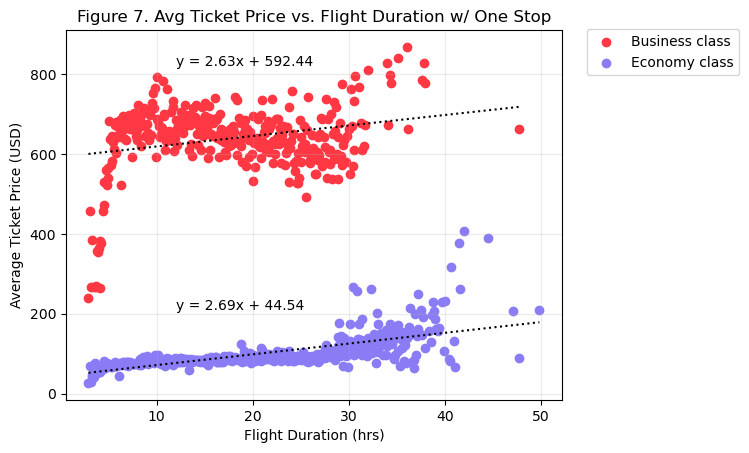

<Figure size 640x480 with 0 Axes>

In [12]:
# Created dataset with one stop only
onestop_df = flight_data.loc[flight_data["stops"]== "one", :]

#Created dataframes of Average prices grouped by Class and Duration
os_avg_price = pd.DataFrame(onestop_df.groupby(["class", "duration"])["price_USD"].mean()).reset_index()

#Separated df for Economy class only
os_avg_price_eco = os_avg_price.loc[os_avg_price["class"]=="Economy", ["duration", "price_USD"]].reset_index(drop=True)

#Separated df for Business class only
os_avg_price_bus = os_avg_price.loc[os_avg_price["class"]=="Business", ["duration", "price_USD"]].reset_index(drop=True)

#Pre-set X and Y values for plotting (Economy Class)
x_values0eco = os_avg_price_eco["duration"]
y_values0eco = os_avg_price_eco["price_USD"]

#Pre-set X and Y values for plotting (Business Class)
x_values0bus = os_avg_price_bus["duration"]
y_values0bus = os_avg_price_bus["price_USD"]

#Plot scatters for Business and Economy Class
fig1 = plt.scatter(x=x_values0bus, y=y_values0bus, color="#FF3844", label="Business class")
fig2 = plt.scatter(x=x_values0eco, y=y_values0eco, color="#897CF5", label="Economy class")

plt.legend(loc=(1.05,0.878))
plt.grid(alpha=0.25)
plt.xlabel("Flight Duration (hrs)")
plt.ylabel("Average Ticket Price (USD)")
plt.title("Figure 7. Avg Ticket Price vs. Flight Duration w/ One Stop")


# Add the linear regression equation and line to plot (Economy Class)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values0eco, y_values0eco)
regress_values = x_values0eco * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values0eco,regress_values,color="black", linestyle=":")
plt.annotate(line_eq,(12,210),fontsize=10,color="black")

# Add the linear regression equation and line to plot (Business Class)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values0bus, y_values0bus)
regress_values = x_values0bus * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values0bus,regress_values,color="black", linestyle=":")
plt.annotate(line_eq,(12,820),fontsize=10,color="black")

#Correlaion coefficient for Business Class 
business_correlation = st.pearsonr(x_values0bus,y_values0bus)
print(f"Business Class: The correlation between both factors is {round(business_correlation[0],2)}")

#Correlaion coefficient for Economy Class 
economy_correlation = st.pearsonr(x_values0eco,y_values0eco)
print(f"Economy Class: The correlation between both factors is {round(economy_correlation[0],2)}")

plt.show()

plt.savefig("output_data/Fig7.png")

### Conclusions: 
- Analyzing ONE stops flight data:
    - VERY WEAK correlation between Avg Ticket price and Flight Duration in Business class;
    - MODERATE correlation between Avg Ticket price and Flight Duration in Economy class;

### Analysis of Flight Data with Two_or_more Stops (Avg Ticket Price vs Flight Duration)

Business Class: The correlation between both factors is -0.16
Economy Class: The correlation between both factors is 0.45


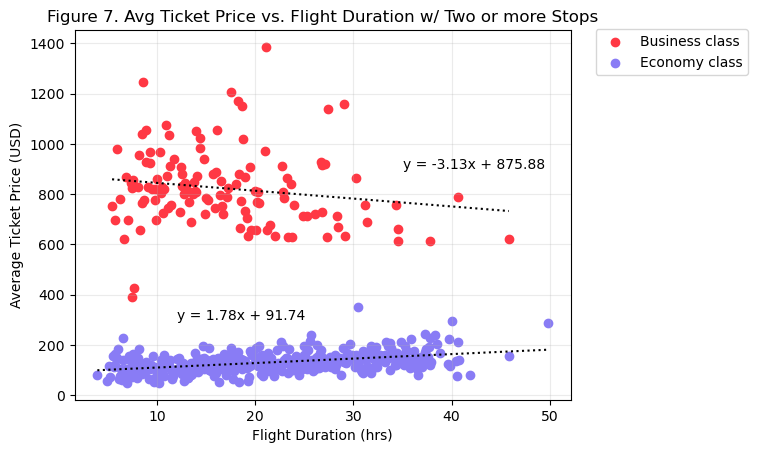

<Figure size 640x480 with 0 Axes>

In [13]:
# Created dataset with two stops only
twostop_df = flight_data.loc[flight_data["stops"]== "two_or_more", :]
ts_avg_price = pd.DataFrame(twostop_df.groupby(["class", "duration"])["price_USD"].mean()).reset_index()

#Separated df for Economy class only
ts_avg_price_eco = ts_avg_price.loc[ts_avg_price["class"]=="Economy", ["duration", "price_USD"]].reset_index(drop=True)

#Separated df for Business class only
ts_avg_price_bus = ts_avg_price.loc[ts_avg_price["class"]=="Business", ["duration", "price_USD"]].reset_index(drop=True)

#Pre-set X and Y values for plotting (Economy Class)
x_values0eco = ts_avg_price_eco["duration"]
y_values0eco = ts_avg_price_eco["price_USD"]

#Pre-set X and Y values for plotting (Business Class)
x_values0bus = ts_avg_price_bus["duration"]
y_values0bus = ts_avg_price_bus["price_USD"]

#Plot scatters for Business and Economy Class
fig1 = plt.scatter(x=x_values0bus, y=y_values0bus, color="#FF3844", label="Business class")
fig2 = plt.scatter(x=x_values0eco, y=y_values0eco, color="#897CF5", label="Economy class")

plt.legend(loc=(1.05,0.878))
plt.grid(alpha=0.25)
plt.xlabel("Flight Duration (hrs)")
plt.ylabel("Average Ticket Price (USD)")
plt.title("Figure 7. Avg Ticket Price vs. Flight Duration w/ Two or more Stops")


# Add the linear regression equation and line to plot (Economy Class)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values0eco, y_values0eco)
regress_values = x_values0eco * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values0eco,regress_values,color="black", linestyle=":")
plt.annotate(line_eq,(12,300),fontsize=10,color="black")


# Add the linear regression equation and line to plot (Business Class)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values0bus, y_values0bus)
regress_values = x_values0bus * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values0bus,regress_values,color="black", linestyle=":")
plt.annotate(line_eq,(35,900),fontsize=10,color="black")

#Correlaion coefficient for Business Class 
business_correlation = st.pearsonr(x_values0bus,y_values0bus)
print(f"Business Class: The correlation between both factors is {round(business_correlation[0],2)}")

#Correlaion coefficient for Economy Class 
economy_correlation = st.pearsonr(x_values0eco,y_values0eco)
print(f"Economy Class: The correlation between both factors is {round(economy_correlation[0],2)}")

plt.show()

plt.savefig("output_data/Fig8.png")

### Conclusions: 
- Analyzing TWO OR MORE stops flight data:
    - NO correlation between Avg Ticket price and Flight Duration in Business class;
    - WEAK correlation between Avg Ticket price and Flight Duration in Economy class;